In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Loans.csv")

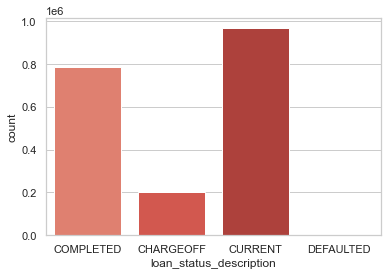

In [3]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="loan_status_description",data=data,palette="Reds_d")

In [4]:
good = len(data[data['loan_status_description']=="COMPLETED"])
defaulted = len(data[data['loan_status_description']=="DEFAULTED"])+len(data[data['loan_status_description']=="CHARGEOFF"])
pct = good/(good+defaulted)
print("percentage of good loan is", pct*100)
pct = defaulted/(good+defaulted)
print("percentage of defaulted loan is", pct*100)

percentage of good loan is 79.43337602293961
percentage of defaulted loan is 20.566623977060377


In [3]:
data.drop(data[data['loan_status_description']=="CURRENT"].index, inplace=True)
data = data.replace(['CHARGEOFF'],'DEFAULTED')

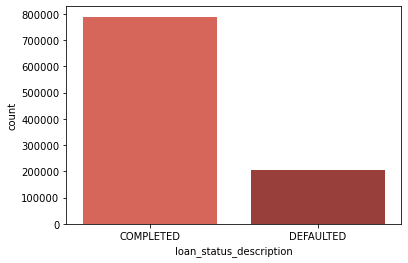

In [4]:
sns.countplot(x="loan_status_description",data=data,palette="Reds_d")
plt.savefig('1_13')

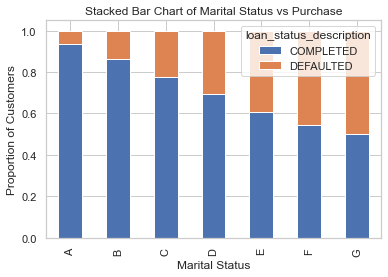

In [7]:
table=pd.crosstab(data.grade,data.loan_status_description)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status vs Grade')
plt.xlabel('grade')
plt.ylabel('Loan Status vs Grade')


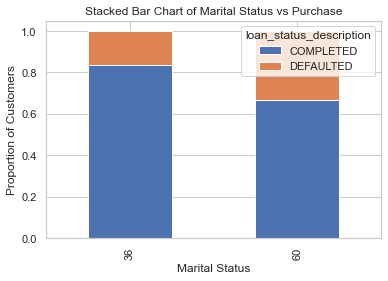

In [8]:
table=pd.crosstab(data.term,data.loan_status_description)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status vs Term')
plt.xlabel('Term')
plt.ylabel('Loan Status Description')
plt.savefig('Status vs Term')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993216 entries, 0 to 1961508
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   993216 non-null  int64  
 1   loan_number                  993216 non-null  int64  
 2   amount_borrowed              993216 non-null  float64
 3   term                         993216 non-null  int64  
 4   borrower_rate                993216 non-null  float64
 5   installment                  993216 non-null  float64
 6   grade                        993216 non-null  object 
 7   origination_date             993216 non-null  object 
 8   listing_title                993216 non-null  object 
 9   principal_balance            993216 non-null  float64
 10  principal_paid               993216 non-null  float64
 11  interest_paid                993216 non-null  float64
 12  late_fees_paid               993216 non-null  float64
 13

In [14]:
data.replace({'grade' : { 'A' : 10, 'B' : 8, 'C' : 6, 'D' : 4,'E' : 2, 'F' : 1,'G' : 0}}, inplace=True)

In [15]:
X = data[['term', 'grade','principal_paid','amount_borrowed','interest_paid']]
y = data['loan_status_description']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred=logreg.predict(X_test)

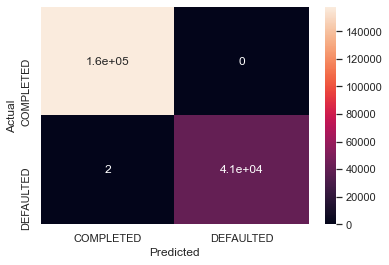

In [19]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [20]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9999899317371781
